In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Charger les données d'origine
data = pd.read_csv('dataframe.csv', sep='\t', encoding='utf-8')

# Aperçu des données
print(data.head())

C:\Users\black\AppData\Local\Temp\ipykernel_14804\1889559807.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataframe.csv', sep='\t', encoding='utf-8')


    code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (

In [3]:
# Obtention des dimensions du data frame
dim = data.shape
print("Nombre de lignes dans le data frame :", dim[0])
print("Nombre de colonnes dans le data frame :", dim[1])

Nombre de lignes dans le data frame : 320772
Nombre de colonnes dans le data frame : 162


In [4]:
data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [5]:
# Identifier les colonnes
columns_list = data.columns.tolist()
print(columns_list)

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

In [6]:
def preprocess_data(df):
    # 1. Filtrer les produits français
    df = df[df['countries_fr'].str.contains('France', na=False)]
    
    # 2. Supprimer les lignes avec des valeurs manquantes dans 'categories'
    df = df.dropna(subset=['categories'])
    
    # 3. Séparer la colonne cible 'categories' du reste du dataset
    X = df.drop(columns=['categories'])
    y = df['categories']
    
    # 4. Sélectionner les features
    selected_features = [
        'energy_100g', 'fat_100g', 'saturated-fat_100g',
        'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
        'salt_100g', 'fiber_100g', 'brands', 'pnns_groups_1',
        'pnns_groups_2'
    ]
    
    X_selected = X[selected_features]
    
    # 5. Supprimer les produits en double
    X_selected = X_selected.drop_duplicates()
    
    # 6. Vérifier les dimensions et les taux de remplissage des features sélectionnées
    print("Dimensions du dataframe après suppression des doublons :", X_selected.shape)
    filling_rate_selected_after = (X_selected.notnull().mean() * 100).round(2)
    print("Taux de remplissage des features sélectionnées :")
    print(filling_rate_selected_after)
    
    return X_selected, y

# Appliquer la fonction de prétraitement
X_processed, y_processed = preprocess_data(data)

Dimensions du dataframe après suppression des doublons : (53176, 11)
Taux de remplissage des features sélectionnées :
energy_100g            84.38
fat_100g               79.54
saturated-fat_100g     80.52
carbohydrates_100g     78.87
sugars_100g            80.71
proteins_100g          83.90
salt_100g              80.85
fiber_100g             53.06
brands                 99.67
pnns_groups_1          97.26
pnns_groups_2         100.00
dtype: float64


# Etape 2

## Visualisation des Données

Box Plots pour Détecter les Valeurs Aberrantes

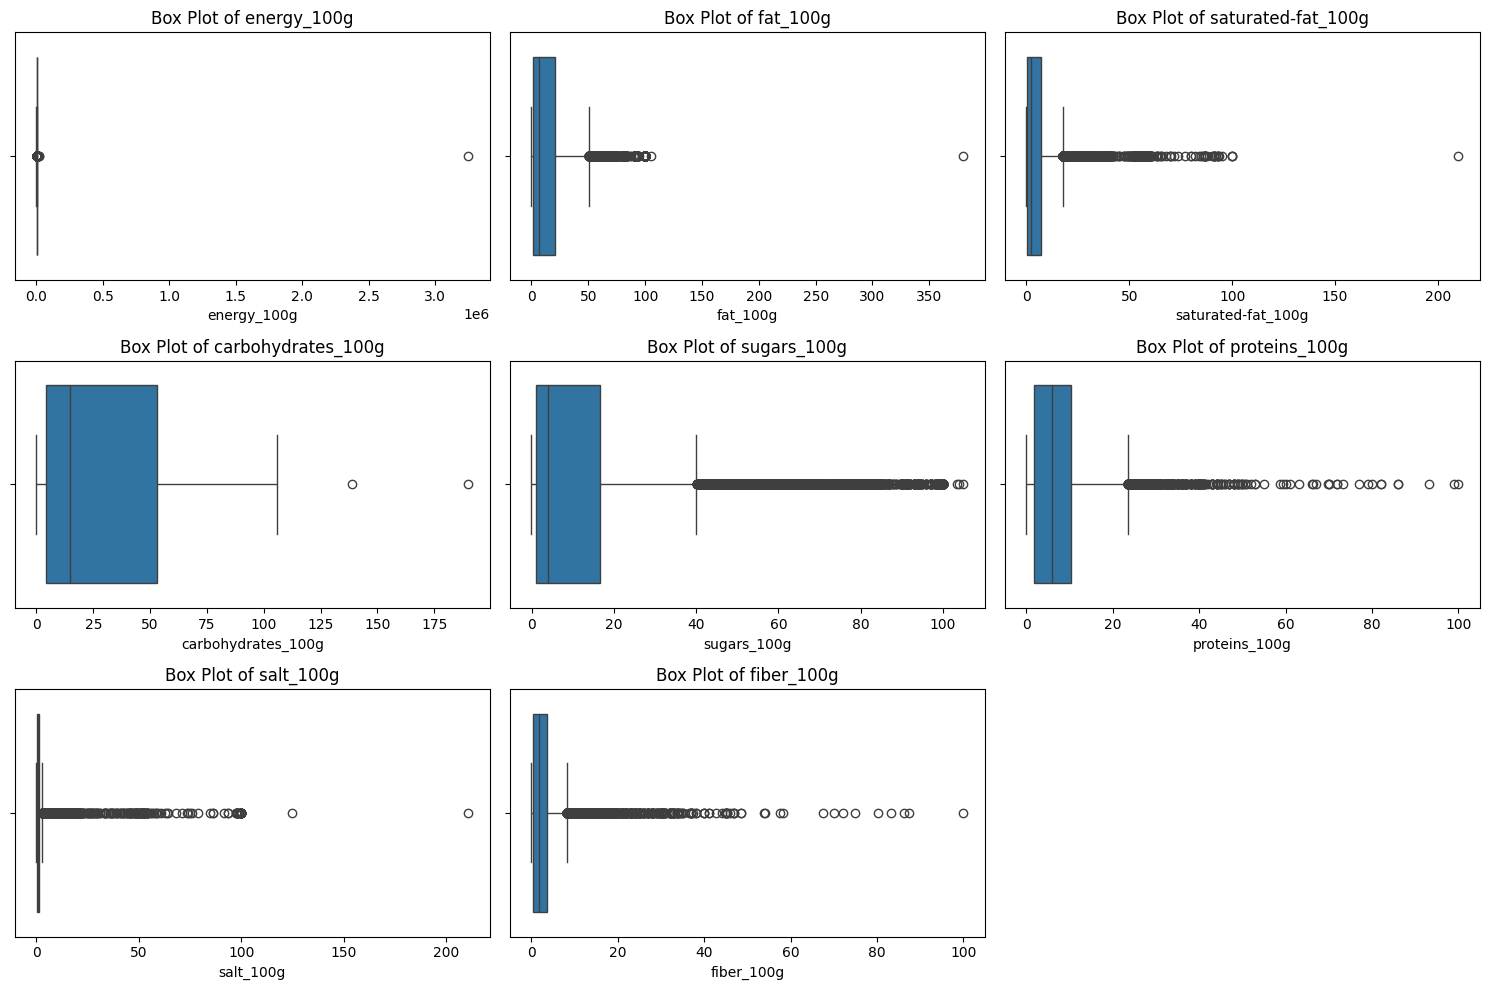

In [7]:
# Liste des features quantitatives
quantitative_features = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
    'salt_100g', 'fiber_100g'
]

# Créer des box plots pour chaque feature quantitative
plt.figure(figsize=(15, 10))
for i, feature in enumerate(quantitative_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=X_processed[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

Histogrammes pour Visualiser la Distribution des Données

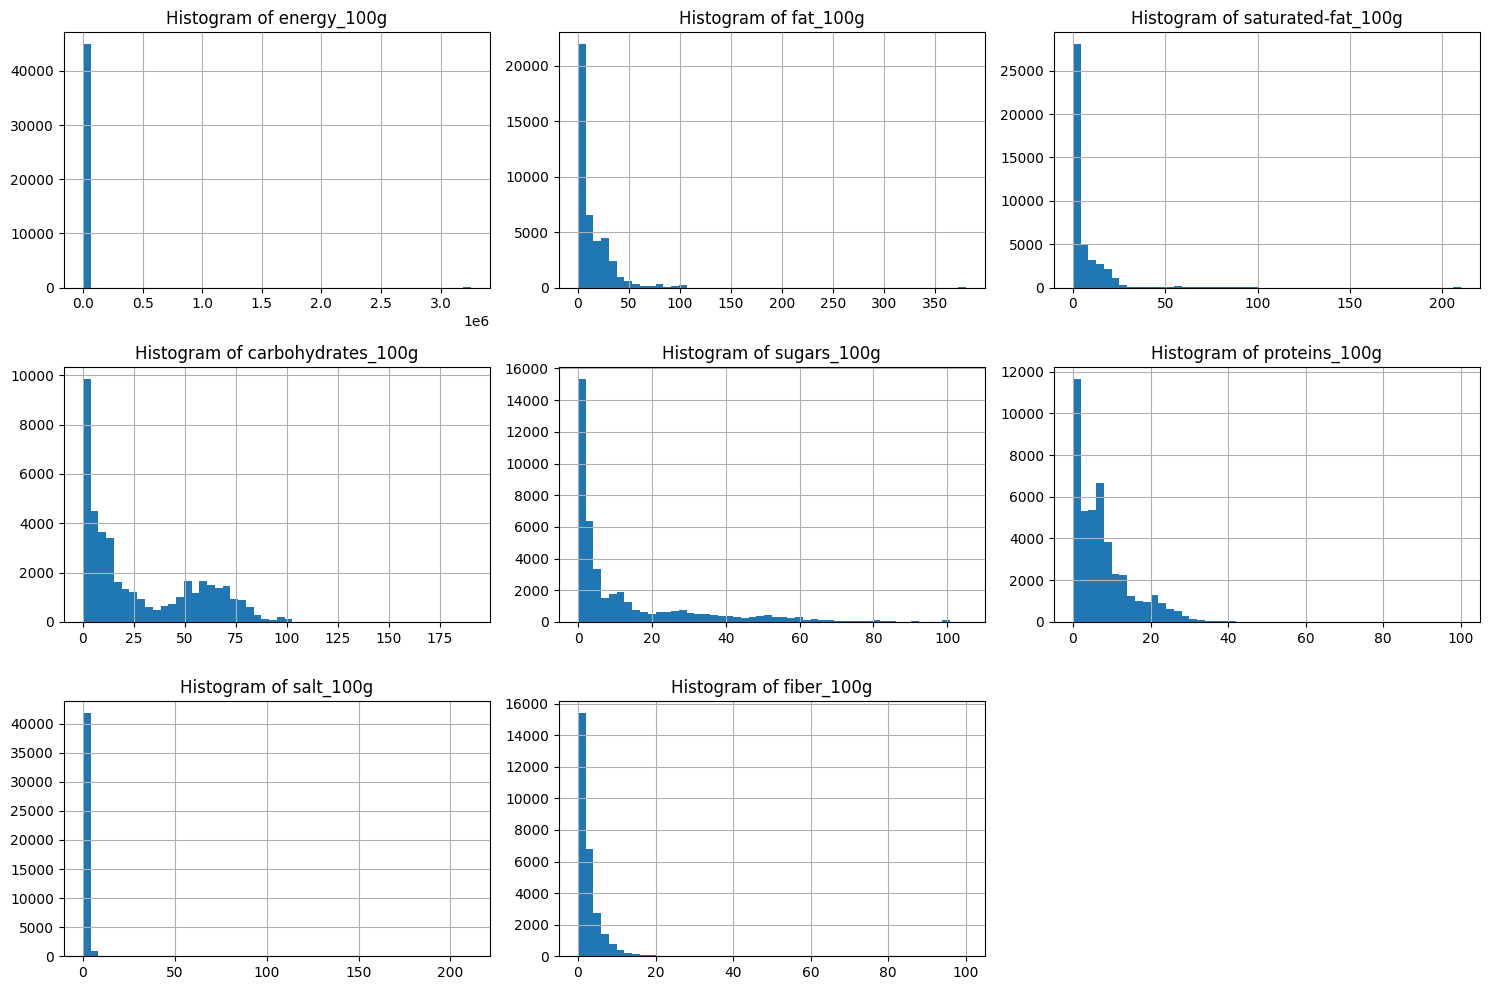

In [8]:
# Créer des histogrammes pour chaque feature quantitative
plt.figure(figsize=(15, 10))
for i, feature in enumerate(quantitative_features, 1):
    plt.subplot(3, 3, i)
    X_processed[feature].hist(bins=50)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

## Identification des Valeurs Aberrantes

### Approche Orientée Métier

#### Feature 'energie_100g'

In [9]:
# Compter les valeurs à 0 dans 'energy_100g'
zero_energy_products = X_processed[X_processed['energy_100g'] == 0]
print(f'Nombre de valeurs à 0 dans energy_100g : {zero_energy_products.shape[0]}')

Nombre de valeurs à 0 dans energy_100g : 189


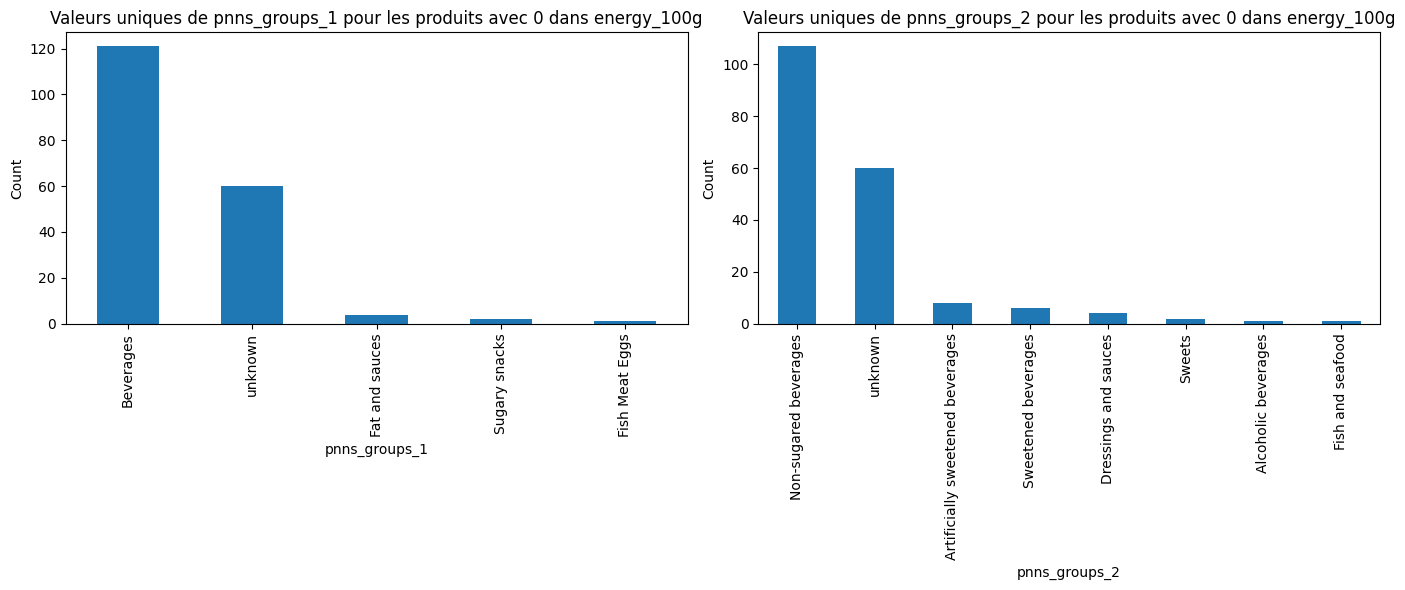

In [10]:
# Compter les valeurs uniques de 'pnns_groups_1' et 'pnns_groups_2'
zero_energy_pnns_groups_1_counts = zero_energy_products['pnns_groups_1'].value_counts()
zero_energy_pnns_groups_2_counts = zero_energy_products['pnns_groups_2'].value_counts()

# Créer les graphiques à barres
plt.figure(figsize=(14, 6))

# Graphique pour 'pnns_groups_1'
plt.subplot(1, 2, 1)
zero_energy_pnns_groups_1_counts.plot(kind='bar')
plt.title('Valeurs uniques de pnns_groups_1 pour les produits avec 0 dans energy_100g')
plt.xlabel('pnns_groups_1')
plt.ylabel('Count')

# Graphique pour 'pnns_groups_2'
plt.subplot(1, 2, 2)
zero_energy_pnns_groups_2_counts.plot(kind='bar')
plt.title('Valeurs uniques de pnns_groups_2 pour les produits avec 0 dans energy_100g')
plt.xlabel('pnns_groups_2')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [11]:
# Filtrer les produits avec 0 dans 'energy_100g'
zero_energy_products = X_processed[X_processed['energy_100g'] == 0]

# Exclure les catégories valides
excluded_zero_energy_products = zero_energy_products[
    ~(
        (zero_energy_products['pnns_groups_1'] == 'Beverages') |
        (zero_energy_products['pnns_groups_2'] == 'Non-sugared beverages') |
        (zero_energy_products['pnns_groups_2'] == 'Artificially sweetened beverages')
    )
]

# Recompter les valeurs restantes
excluded_zero_energy_count = excluded_zero_energy_products.shape[0]
print(f'Nombre de valeurs à 0 dans energy_100g après exclusion : {excluded_zero_energy_count}')

Nombre de valeurs à 0 dans energy_100g après exclusion : 68


In [12]:
# Supprimer les individus avec 0 dans 'energy_100g' en excluant les catégories valides
X_processed = X_processed.drop(excluded_zero_energy_products.index)

# Vérifier la nouvelle taille du dataset
print(f'Nombre de lignes après suppression des valeurs suspectes dans energy_100g : {X_processed.shape[0]}')

Nombre de lignes après suppression des valeurs suspectes dans energy_100g : 53108


In [13]:
# Définir les seuils en kJ
low_kj = 63  # 15 kcal
high_kj = 3766  # 900 kcal

# Compter les valeurs en dessous du seuil minimum, en excluant les valeurs à 0
below_min = X_processed[(X_processed['energy_100g'] < low_kj) & (X_processed['energy_100g'] != 0)].shape[0]

# Compter les valeurs au-dessus du seuil maximum
above_max = X_processed[X_processed['energy_100g'] > high_kj].shape[0]

print(f'Nombre de valeurs en dessous de {low_kj} kJ (sans compter les 0) :', below_min)
print(f'Nombre de valeurs au-dessus de {high_kj} kJ :', above_max)

Nombre de valeurs en dessous de 63 kJ (sans compter les 0) : 671
Nombre de valeurs au-dessus de 3766 kJ : 35


In [14]:
# Calculer les statistiques avant le remplacement
before_replacement_stats = X_processed['energy_100g'].describe()

# Calculer la médiane des valeurs valides
median_energy = X_processed[(X_processed['energy_100g'] >= low_kj) & (X_processed['energy_100g'] <= high_kj)]['energy_100g'].median()

# Remplacer les valeurs en dehors des seuils par la médiane
X_processed['energy_100g'] = np.where((X_processed['energy_100g'] < low_kj) & (X_processed['energy_100g'] != 0), median_energy, X_processed['energy_100g'])
X_processed['energy_100g'] = np.where(X_processed['energy_100g'] > high_kj, median_energy, X_processed['energy_100g'])

# Calculer les statistiques après le remplacement
after_replacement_stats = X_processed['energy_100g'].describe()

# Créer un DataFrame pour comparer les statistiques
comparison_stats = pd.DataFrame({
    'Avant Remplacement': before_replacement_stats,
    'Après Remplacement': after_replacement_stats
})

# Arrondir les valeurs pour une meilleure lisibilité
comparison_stats_rounded = comparison_stats.round(2)

print('Comparaison des valeurs avant et après remplacement des outliers par la médiane :')
print(comparison_stats_rounded)

Comparaison des valeurs avant et après remplacement des outliers par la médiane :
       Avant Remplacement  Après Remplacement
count            44803.00            44803.00
mean              1164.03             1102.91
std              15375.55              756.05
min                  0.00                0.00
25%                407.00              434.00
50%               1004.00             1021.00
75%               1632.00             1632.00
max            3251373.00             3766.00


In [15]:
# Lister les valeurs en dessous du seuil minimum
print('Valeurs en dessous du seuil minimum :')
print(X_processed[X_processed['energy_100g'] < low_kj])

Valeurs en dessous du seuil minimum :
        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
886             0.0       NaN                 0.0                 NaN   
59742           0.0       NaN                 0.0                 0.0   
60623           0.0       0.0                 0.0                 0.0   
84467           0.0       0.0                 NaN                 0.0   
87444           0.0       0.0                 NaN                 0.0   
...             ...       ...                 ...                 ...   
313776          0.0       NaN                 0.0                 NaN   
315622          0.0       0.0                 0.0                 0.0   
315700          0.0       0.0                 0.0                 0.0   
317399          0.0       0.0                 NaN                 0.0   
318526          0.0       0.0                 0.0                 0.0   

        sugars_100g  proteins_100g  salt_100g  fiber_100g  \
886             0.0     

In [16]:
# Lister les valeurs au-dessus du seuil maximum
print('Valeurs au-dessus du seuil maximum :')
print(X_processed[X_processed['energy_100g'] > high_kj])

Valeurs au-dessus du seuil maximum :
Empty DataFrame
Columns: [energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, proteins_100g, salt_100g, fiber_100g, brands, pnns_groups_1, pnns_groups_2]
Index: []


### Méthode Statistique : Plages Interquartiles (IQR)

In [17]:
def detect_outliers_iqr(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return outliers

quantitative_features = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
    'salt_100g', 'fiber_100g'
]

outliers = detect_outliers_iqr(X_processed, quantitative_features)
for feature, values in outliers.items():
    print(f'Outliers in {feature}:\n{values}\n')

Outliers in energy_100g:
115021    3700.0
175293    3448.0
177122    3464.0
177124    3464.0
177219    3700.0
           ...  
311965    3700.0
313420    3700.0
313907    3760.0
315385    3700.0
315860    3766.0
Name: energy_100g, Length: 269, dtype: float64

Outliers in fat_100g:
11300      52.1
11303      52.1
11356      65.2
11779      55.4
34626      51.6
          ...  
316116     60.0
316233    100.0
320162     59.4
320578     92.0
320656     92.0
Name: fat_100g, Length: 1463, dtype: float64

Outliers in saturated-fat_100g:
695       19.7
13110     20.8
27215     24.0
29090     20.0
35807     20.0
          ... 
320309    20.0
320578    86.0
320589    18.0
320598    22.0
320656    39.0
Name: saturated-fat_100g, Length: 3308, dtype: float64

Outliers in carbohydrates_100g:
245311    190.0
317635    139.0
Name: carbohydrates_100g, dtype: float64

Outliers in sugars_100g:
452       96.0
1343      56.8
1346      56.8
9744      48.0
9890      70.3
          ... 
318376    58.0
318503 